In [35]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

In [3]:
mask_ = Image.open("/home/eric/srcs/FewShotSeg_Lab/FewShotVision_Lab/SmallObjectFSS/SOFS/Open_Domain_Data/severstal_steel/support/mask/56de9f0d1_mask.png")

filename /home/eric/srcs/FewShotSeg_Lab/FewShotVision_Lab/SmallObjectFSS/SOFS/Open_Domain_Data/severstal_steel/support/mask/56de9f0d1_mask.png


In [6]:
mask_ = np.asarray(mask_)

In [8]:
np.unique(mask_)

array([  0, 255], dtype=uint8)

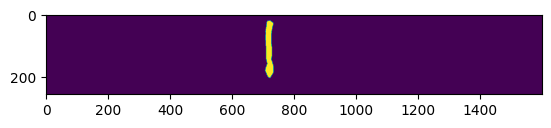

In [11]:
plt.imshow(mask_)

In [90]:
import json
from PIL import Image, ImageDraw


image_id_ = "000068"
img_path = f"/home/eric/srcs/FewShotSeg_Lab/FewShotVision_Lab/SmallObjectFSS/SOFS/Open_Domain_Data/Your_Own_Data/support/image/{image_id_}.jpg"
coco_label_path = "/home/eric/srcs/FewShotSeg_Lab/FewShotVision_Lab/SmallObjectFSS/SOFS/Open_Domain_Data/Your_Own_Data/Capacitor_annotations.coco.json"

In [91]:
img_data = Image.open(img_path)
with open(f"{coco_label_path}", "r", encoding="utf-8") as file:
    data = json.load(file)  


filename /home/eric/srcs/FewShotSeg_Lab/FewShotVision_Lab/SmallObjectFSS/SOFS/Open_Domain_Data/Your_Own_Data/support/image/000068.jpg


In [92]:
# Define the polygon coordinates
img_id = [i for i in data['images'] if i['file_name'] == f'{image_id_}.jpg'][0]['id']
coords = [i for i in data['annotations'] if i['image_id'] == img_id][0]['segmentation'][0]

# Reshape the coordinates to a list of (x, y) tuples
polygon = [(coords[i], coords[i + 1]) for i in range(0, len(coords), 2)]

# Define the size of the mask image (adjust size as needed)


width, height = img_data.size[0], img_data.size[1]  # for example, make sure it's large enough to contain the polygon

# Create a blank (black) mask image
mask = Image.new("L", (width, height), 0)

# Draw the polygon on the mask image with white color
draw = ImageDraw.Draw(mask)
draw.polygon(polygon, outline=1, fill=255)  # '1' for white in binary mask

# Save or show the mask image
mask.save("/home/eric/srcs/FewShotSeg_Lab/FewShotVision_Lab/SmallObjectFSS/SOFS/Open_Domain_Data/Your_Own_Data/support/mask/segmentation_mask.png")


In [93]:
img_data.size

(640, 480)

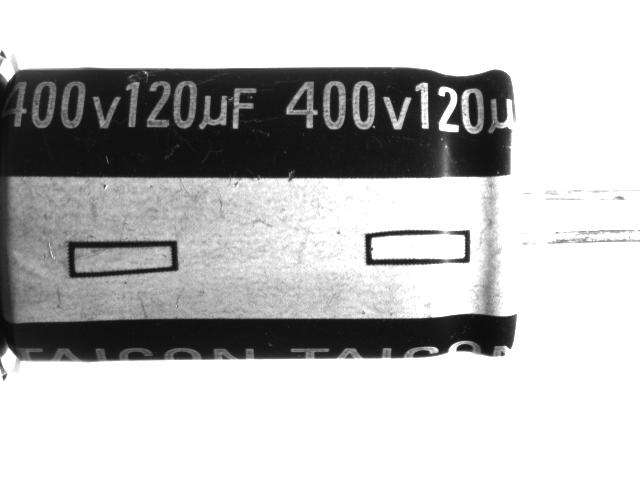

In [94]:
img_data

In [95]:
mask.size

(640, 480)

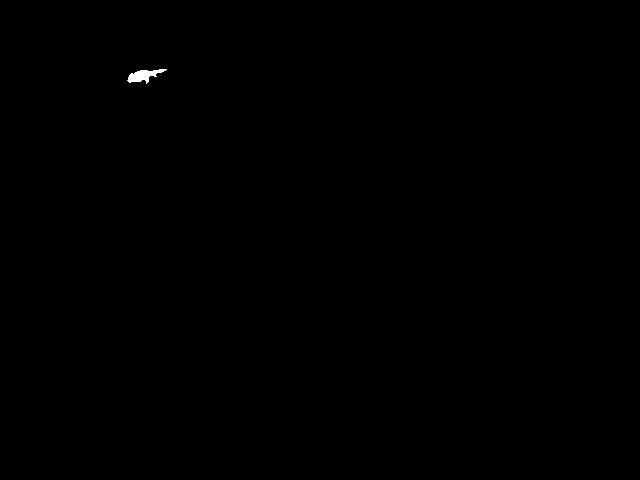

In [96]:
mask

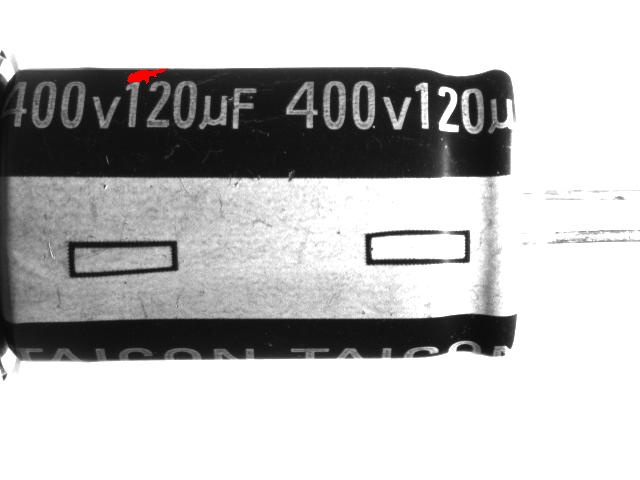

In [97]:
img_data.paste((255,0,0,128), mask=mask)
img_data